In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import os
%matplotlib inline

In [2]:
data_path = './data'

In [3]:
print('正在加载数据集')
print('--'*30)
train_row_data = pd.read_csv(os.path.join(data_path, 'data_ceshi_copy.csv'))
print('数据加载完成')
train_row_data = train_row_data.drop_duplicates(subset=['id_card_no', 'card_name', 'loan_date'],keep='first')
train_data = train_row_data.reset_index(drop=True)

train_data.drop(['card_name','id_card_no','loan_date'], inplace=True, axis=1)
train_data.shape

正在加载数据集
------------------------------------------------------------
数据加载完成


(4240, 38)

In [4]:
train_row_data.shape

(4240, 41)

In [21]:
min_max = MinMaxScaler()
train_data_min_max = min_max.fit_transform(train_data)

X_data, val_data = train_test_split(train_data_min_max, test_size=1/4, random_state=10)
X_train, y_train = X_data[:, 1 :], X_data[:, 0]
X_val, y_val = val_data[:, 1 :], val_data[:, 0]
# X_data, val_data = train_test_split(train_data, test_size=1/4, random_state=10)
# X_train, y_train = X_data.iloc[:, 1 :], X_data.iloc[:, 0]
# X_val, y_val = val_data.iloc[:, 1 :], val_data.iloc[:, 0]

In [22]:
y_train.shape

(3180,)

In [23]:
dt_model =  DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 

dot_data = tree.export_graphviz(dt_model, out_file=None, 
                         feature_names=train_data.columns[1:],
#                          class_names=str(y_train),  
                         class_names=['0','1'],
                         filled=True, rounded=True,
                         special_characters=True)


In [26]:
dot_data=dot_data.replace('helvetica','"Microsoft Yahei"')
graph = pydotplus.graph_from_dot_data(dot_data)

In [27]:
y_pred = dt_model.predict(X_train)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [121]:
#labels表示你不同类别的代号，比如这里的demo中有13个类别
labels = [0,1]
#y_true代表真实的label值 y_pred代表预测得到的lavel值
tick_marks = np.array(range(len(labels))) + 0.5
def plot_confusion_matrix(y_train, y_pred,title='Confusion Matrix', cmap=plt.cm.binary):
    cm = confusion_matrix(y_train, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    np.set_printoptions(precision=2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)

    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm_normalized[y_val][x_val]
        if c > 0.01:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=16, va='center', ha='center')
    # offset the tick
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)


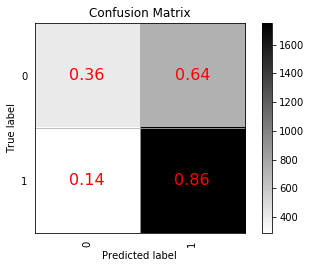

In [122]:
plot_confusion_matrix(y_train, y_pred)
# show confusion matrix
plt.show()

In [69]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [31]:
importance_feature = zip(train_data.columns[1:],dt_model.feature_importances_)
for imp in importance_feature:
    print(imp)

('申请准入分', 0.0)
('申请准入置信度', 0.0)
('查询机构数', 0.0)
('查询消费金融类机构数', 0.0)
('查询网络贷款类机构数', 0.0)
('总查询次数', 0.0)
('近1个月总查询笔数', 0.19204589497615093)
('近3个月总查询笔数', 0.011806428049520376)
('近6个月总查询笔数', 0.07315359844880676)
('贷款行为分', 0.06445327299446828)
('贷款行为置信度', 0.0)
('贷款放款总订单数', 0.0)
('贷款已结清订单数', 0.1092839501153913)
('贷款逾期订单数（M0+）', 0.0)
('贷款机构数', 0.0)
('消费金融类机构数', 0.0)
('网络贷款类机构数_x', 0.0)
('近1个月贷款笔数', 0.0)
('近3个月贷款笔数', 0.042555218955659065)
('近6个月贷款笔数', 0.0)
('历史贷款机构成功扣款笔数', 0.021129987533729237)
('历史贷款机构失败扣款笔数', 0.0361393045822592)
('近1个月贷款机构成功扣款笔数', 0.23796151713227293)
('近1个月贷款机构失败扣款笔数', 0.0495966947095736)
('信用贷款时长', 0.0)
('网贷建议授信额度', 0.036875889386040535)
('网贷额度置信度', 0.0)
('网络贷款类机构数_y', 0.0)
('网络贷款类产品数', 0.0)
('网络贷款机构最大授信额度', 0.0)
('网络贷款机构平均授信额度', 0.0)
('消金建议授信额度', 0.0)
('消金额度置信度', 0.0)
('消金贷款类机构数', 0.0)
('消金贷款类产品数', 0.12499824311612767)
('消金贷款类机构最大授信额度', 0.0)
('消金贷款类机构平均授信额度', 0.0)


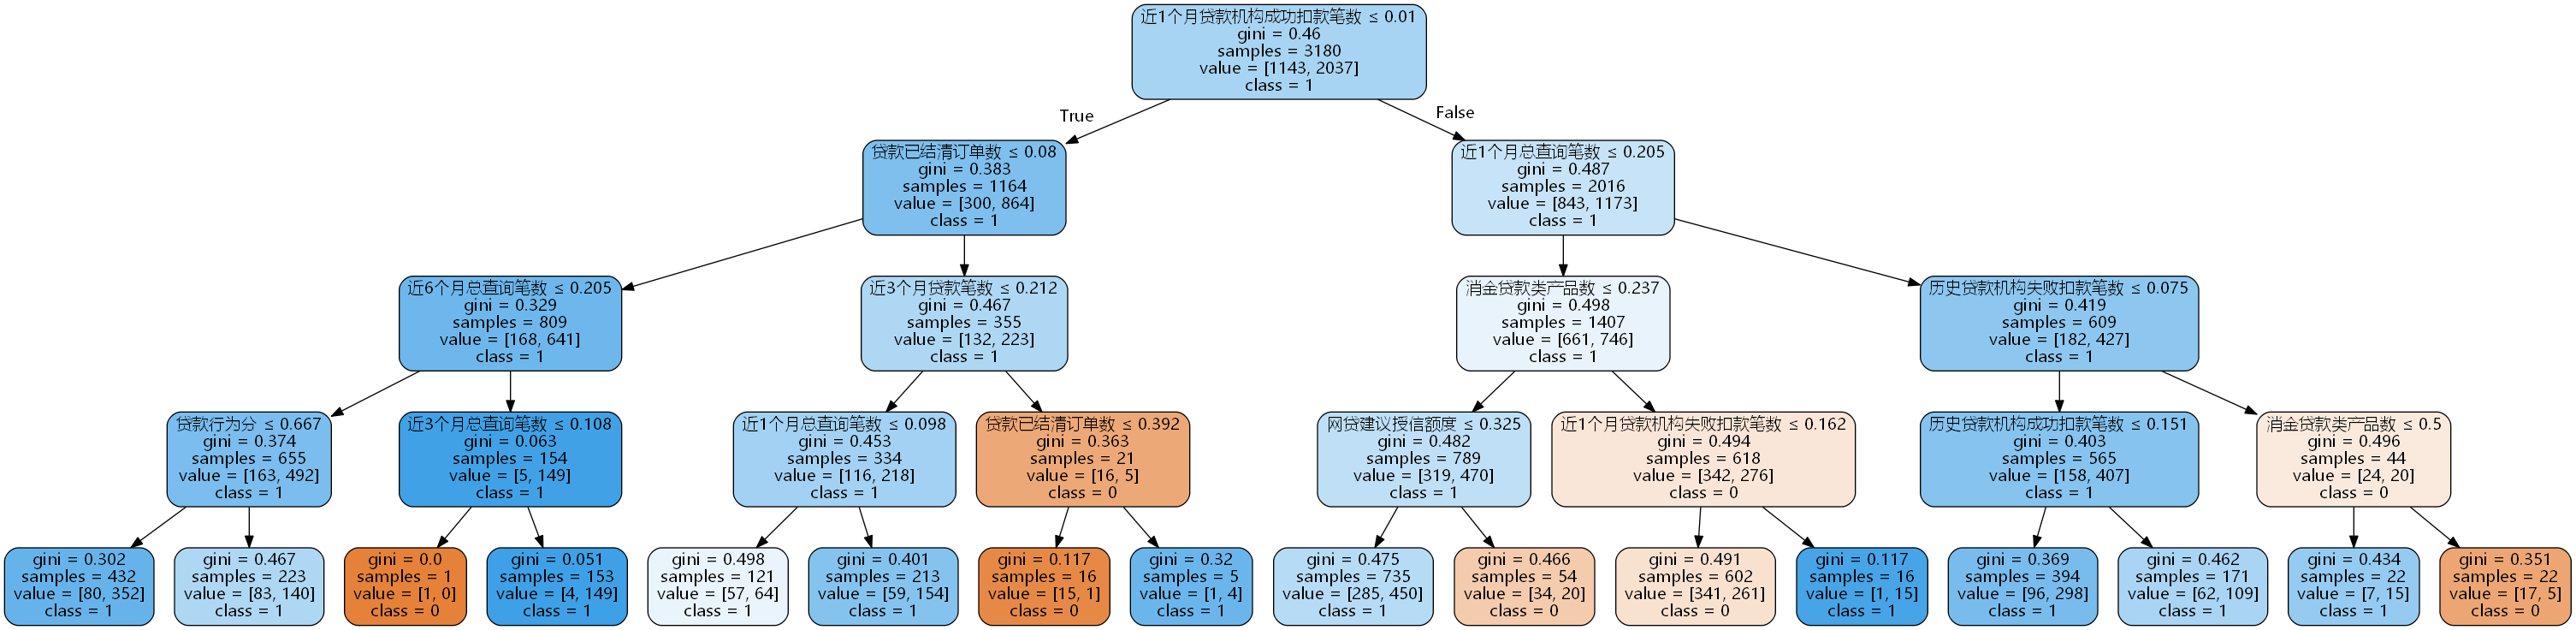

In [32]:
Image(graph.create_png())